# **Scikit-learn - Topic 3: Tree-based models for Regression and Classification**

## Objectives

* Implement and Evaluate Tree-Based Models for Regression and Classification




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\ML_practice\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\ML_practice'

# Tree-based models for Regression and Classification

This section covers  the practical steps and code for fitting a pipeline considering Tree-based models, such as Decision Trees and Random Forests.
A typical workflow used for this supervised learning is;

* Split the dataset into train and test set
* Fit the pipeline
* Evaluate your model. If the performance is not good, revisit the process, starting from defining the business case, collecting the data, conducting EDA (Exploratory Data Analysis), etc.

#### Import Packages for Learning
We will install scikit-learn, xgboost, feature-engine and yellow brick to run our exercises.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

### Regression

We will use the California Housing dataset from sklearn for the Regression task.

* It has house age records and characteristics, like the average number of rooms per dwelling and population in California.


In [5]:
# Load the California Housing dataset from sklearn
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df_reg = pd.DataFrame(data.data,columns=data.feature_names)
df_reg['price'] = pd.Series(data.target)

df_reg = df_reg.sample(frac=0.1, random_state=101)

print(df_reg.shape)
df_reg.head(3)

(2064, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
16086,5.6204,36.0,6.110738,0.979866,742.0,2.489933,37.73,-122.49,4.06200
8816,11.6677,37.0,7.605634,0.950704,366.0,2.577465,33.75,-118.32,5.00001
7175,2.4375,47.0,4.896154,1.015385,1193.0,4.588462,34.05,-118.19,1.22900


### Classification

We will use the Iris dataset from seaborn for the Classification task.

It contains records of three varieties of iris plants, with their petal and sepal measurements.

In [6]:
# Load the Iris dataset from seaborn
df_clf = sns.load_dataset('iris').sample(frac=0.7, random_state=101)
print(df_clf.shape)
df_clf.head(3)

(105, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa


We will cover the following tree algorithms, which include ensemble tree algorithms.

* Decision Tree
* Random Forest
* Gradient Boosting
* Ada Boost
* XG Boost (eXtreme Gradient Boost)
* Extra Tree

    * Classification task for Decision Tree, Gradient Boosting and XG Boost.
    * Regression task for Random Forest, Ada Boost and Extra Tree.

### Decision Tree


A decision tree is like a flow chart, where each question has a yes/no answer. As you get deeper, you move from a general question to a very specific question. The questions asked must be ones where the yes or no answer gives useful insights into the data.
When using the decision tree algorithm in Scikit-learn, you will import a different estimator depending on your task (regression or classification).

There is the suffix "Regressor" in the estimator when the algorithm will be used for a regression task, and, as you may expect, there is the suffix "Classifier" in the estimator when the algorithm is used for the classification task.
That pattern repeats for the other tree-based algorithm.
The difference is subtle. However, it is worth pointing out.
Find here the documentation for both [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

We will import both but will use the DecisionTreeClassifier for the exercise.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

There is no missing data and the target variable is species.

In [8]:
df_clf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa
129,7.2,3.0,5.8,1.6,virginica
50,7.0,3.2,4.7,1.4,versicolor


In [9]:
#split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_clf.drop(['species'],axis=1),
                                    df_clf['species'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (84, 4) (84,) 
* Test set: (21, 4) (21,)


As this is a clean and complete data set no data cleaning or feature engineering steps are required.
* We then set feature scaling, feature selection and modelling using the DecisionTreeClassifier. We set random_state so that the results will be reproducible anywhere. We chain these steps in a sklearn Pipeline.

In [10]:
### Pipeline
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.tree import DecisionTreeClassifier


def pipeline_decision_tree_clf():
  pipeline = Pipeline([
      ( "feat_scaling",StandardScaler() ),

      ( "feat_selection",SelectFromModel(DecisionTreeClassifier(random_state=101)) ),
      
      ( "model", DecisionTreeClassifier(random_state=101)),

    ])

  return pipeline

pipeline_decision_tree_clf()

Pipeline(steps=[('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=101))),
                ('model', DecisionTreeClassifier(random_state=101))])

In [11]:
#fit the pipeline on the training set
pipeline = pipeline_decision_tree_clf()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=101))),
                ('model', DecisionTreeClassifier(random_state=101))])

Since this is a tree-based model, we can assess the importance of the features in the model using .features_importance_ . We can create a function for this process.

In [12]:
def feature_importance_tree_based_models(model, columns):
  """
  Gets the model and the columns used to train the model
  - We use the model.feature_importances_ and columns to make a
  DataFrame that shows the importance of each feature
  - Next, we print the feature name and its relative importance order,
  followed by a barplot indicating the importance

  """

  # create DataFrame to display feature importance
  df_feature_importance = (pd.DataFrame(data={
      'Features': columns,
      'Importance': model.feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )

  best_features = df_feature_importance['Features'].to_list()

  # Most important features statement and plot
  print(f"* These are the {len(best_features)} most important features in descending order. "
        f"The model was trained on them: \n{df_feature_importance['Features'].to_list()}")

  df_feature_importance.plot(kind='bar',x='Features',y='Importance')
  plt.show()

* The model argument is the 'model' step from the pipeline (we don't parse the pipeline since we need only the model step)
* In the columns argument, we subset the feature selection step where we grab a boolean array informing which features hit the model - pipeline['feat_selection'].get_support(). This array is used to subset the features from train set columns.
* Note that only two features - ['petal_width', 'petal_length'] - out of four were used to train the model, and they have roughly similar relevance

* These are the 2 most important features in descending order. The model was trained on them: 
['petal_width', 'petal_length']


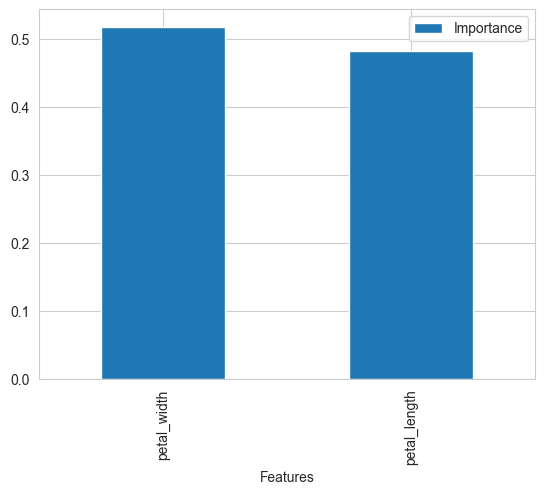

In [13]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns =  X_train.columns[pipeline['feat_selection'].get_support()]
                                     )

We can now evaluate the Classifier.

In [16]:
# loads confusion_matrix and classification_report from sklearn
from sklearn.metrics import classification_report, confusion_matrix

def confusion_matrix_and_report(X,y,pipeline,label_map):
  """
  Gets features, target, pipeline and how labelled (named) the levels from your target

  - it predicts based on features
  - compare predictions and actuals in a confusion matrix
    - the first argument stays as rows and the second stay as columns in the matrix
    - we will use the pattern where the predictions are in the row and actual values are in the columns
    - to refresh that, revert to the Performance Metric video in Module 2
  - show classification report

  """

  prediction = pipeline.predict(X)

  print('---  Confusion Matrix  ---')
  print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
        columns=[ ["Actual " + sub for sub in label_map] ], 
        index= [ ["Prediction " + sub for sub in label_map ]]
        ))
  print("\n")


  print('---  Classification Report  ---')
  print(classification_report(y, prediction, target_names=label_map),"\n")

def clf_performance(X_train,y_train,X_test,y_test,pipeline,label_map):
  """
  gets the features and target from train and test set, pipeline how
  you labelled (named) the levels from your target
  - for each set (train and test), it calls the function above to show the confusion matrix
  and classification report for both train and test set
  """

  print("#### Train Set #### \n")
  confusion_matrix_and_report(X_train,y_train,pipeline,label_map)

  print("#### Test Set ####\n")
  confusion_matrix_and_report(X_test,y_test,pipeline,label_map)


For this dataset, the target variable wasn't a set of numbers referring to classes, but rather, strings.

We are parsing, from df_clf, the unique values from the target as the label_map parameter.

In [17]:
df_clf['species'].unique()

array(['setosa', 'virginica', 'versicolor'], dtype=object)

Now we can evaluate the Classifier against train and test sets

In [18]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map= df_clf['species'].unique()
                )

#### Train Set #### 

---  Confusion Matrix  ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                30                0                 0
Prediction virginica              0               26                 0
Prediction versicolor             0                0                28


---  Classification Report  ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
   virginica       1.00      1.00      1.00        26
  versicolor       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84
 

#### Test Set ####

---  Confusion Matrix  ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                 8                0                 0
Prediction virginica              0                7         

We can see the Classiifer was a perfect match for the training set and slightly less so, but still very good, against the test set.

When using DecisionTree, we can visualise the created tree.

* Sckit learn has a plot_tree() function that is okay and can help us. The documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). 
* We parse:decision_tree as the model step in our pipeline
* feature_names as the variable used to train the model. That is done by extracting the information from the feature selection step
* class_names are taken from unique values from species
* The remaining arguments help us to get a cleaner visualisation

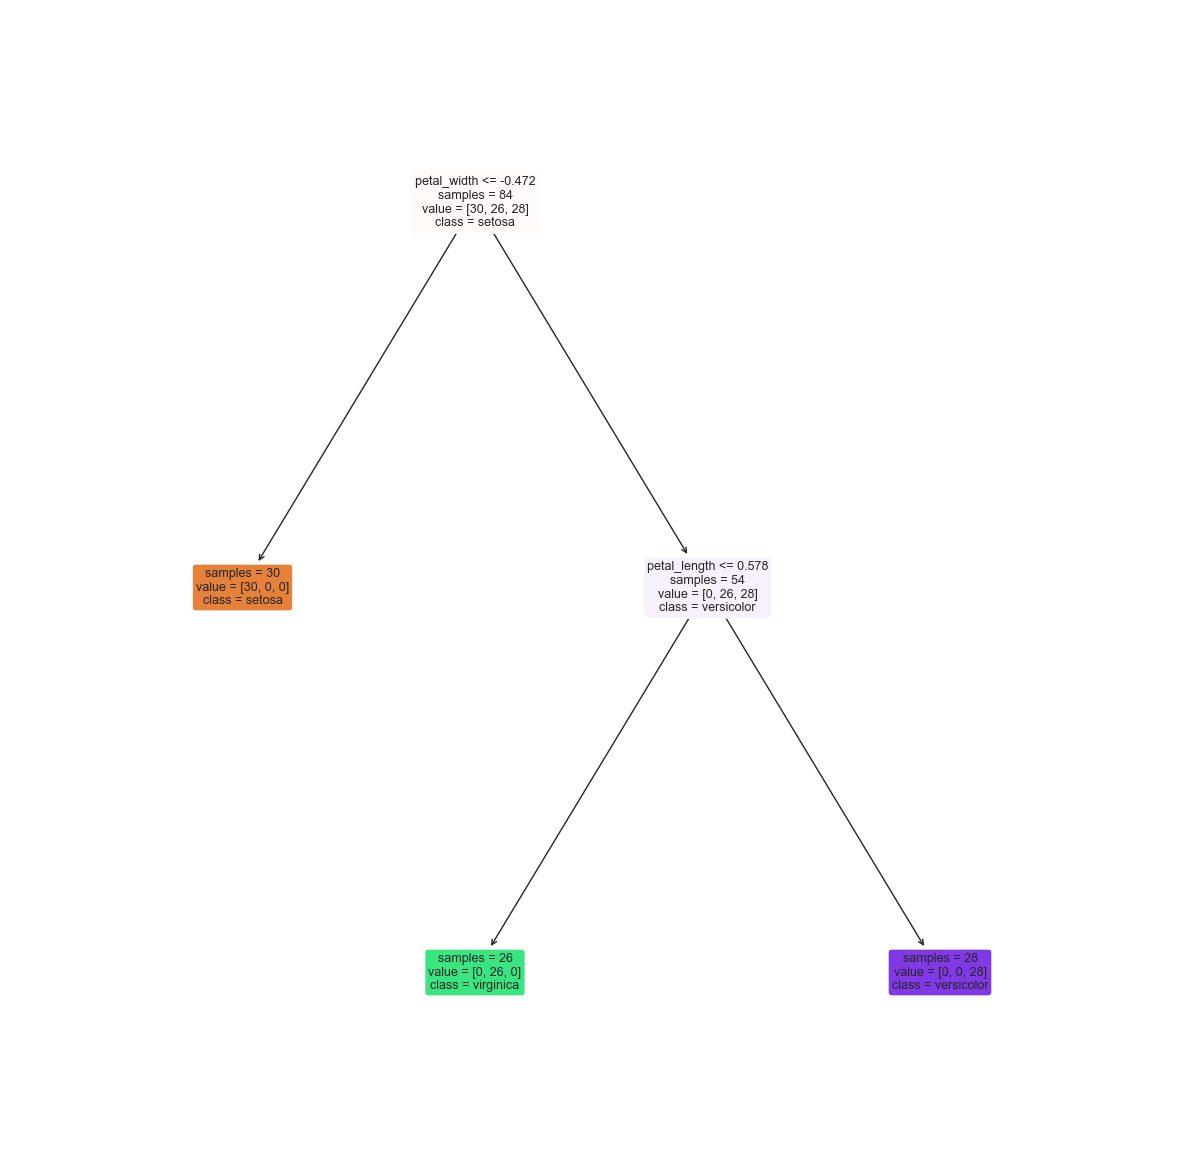

In [19]:
# Visualising the Decision Tree
from sklearn import tree

fig = plt.figure(figsize=(15,15))
tree.plot_tree(decision_tree = pipeline['model'], 
               feature_names = X_train.columns[pipeline['feat_selection'].get_support()],
               class_names = df_clf['species'].unique(),
               filled=True,
               rounded=True,
               fontsize=9,
               impurity=False)
plt.show()

The negative values  occur because the feature scaling step scaled the data using a standard scaler. We can grab this pipeline step and use .inverse_transformation() to convert the scaled value to the original.

We create a DataFrame that relates to the original data. For petal_width and petal_length we set the decision points from the previous map. We parse the DataFrame to .inverse_transform
The decision points are actually 5.4 for petal_width, 3.3 for petal_length

In [22]:
scaled_data = pd.DataFrame(data={'petal_width':-0.472,
                                 'petal_length':0.578,
                                 'sepal_length':1.0, # this value doesn't matter, but needs to be here
                                 'sepal_width':1.0}, # this value doesn't matter, but needs to be here
                           index=[0])


pipeline['feat_scaling'].inverse_transform(scaled_data)

array([[5.41951631, 3.30218132, 5.51251128, 1.9317954 ]])

We can now the values for each feature, before the feature scaling step.

### Random Forest